In [73]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [6]:
def matrix_multiply(A, B):
    a = np.array(A)
    b = np.array(B)
    return a.dot(b)

A = [ [1,2,3], [4,5,6] ]
B = [ [1,2,3], [4,5,6], [7,8,9] ]

print(matrix_multiply(A, B))
print("--------")
A = np.array([ [1,2,3] ])
B = np.array([ [1], [4], [7] ])
print(matrix_multiply(A, B))

[[30 36 42]
 [66 81 96]]
--------
[[30]]


# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [7]:
# Question 2.1:
[[1, 2, 3],
 [1, 2, 3],
 [0, 0, 0]]

[[-1, 2, -3],
 [1, -2, 3],
 [2, -4, 6]]

[[0, 0, 0],
 [1, -1, 1],
 [1, -1, 1]]

[[0, 0, 0], [1, -1, 1], [1, -1, 1]]

#### Question 2.2:
Because the identity matrix is just 0s and 1s on the diagonal. 0 squared is 0 and 1 squared is 1. The identity matrix is essentially the result of the square of itself.

In [ ]:
# Question 2.3:
[[1, 2, 3],
 [4, 5, 6]
 [7, 8, 9]]

[[1],
 [10],
 [100]]

[[1, 5, 25]]

In [11]:
# Question 2.4: tada?
A = np.eye(4)
A.dot(A)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [21]:
# Question 2.5:
A = np.array([[1, 1, 1],
 [0, 2, 5],
 [2, 5, -1]])

B = np.array([[6],
     [-4],
     [27]])

np.linalg.solve(A, B)

# x = np.linalg.solve(A, B)
# A @ x || A.dot(x)

array([[ 6.],
       [-4.],
       [27.]])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [57]:
# got help from Matthieu
df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

In [58]:
y = load_boston().target

In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
df = sm.add_constant(df)
est = sm.OLS(y, df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        11:14:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `3.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [61]:
# got help from Matthieu
df = df.drop(columns=["AGE", "INDUS"])

In [62]:
columns = df.columns
for column in columns:
    if column != "const" and column != "CHAS":
        df[column + "^2"] = df[column] ** 2

In [63]:
for column in columns:
    if column != "const" and column != "CHAS":
        df[column + "^3"] = df[column] ** 3

In [ ]:
# 1. dropped AGE and INDUS: AIC = 2804, BIC = 2939 | no polynomials in DF yet
# 2. dropped all ZN, B, RM, and PTRATIO: AIC = 3022, BIC = 3107
# 3. dropped all NOX and RAD, and polinomial CRIM and TAX: AIC = 3049, BIC = 3096
# 4. dropped DIS^3: AIC = 3051, BIC = 3093

# The more I drop, the higher AIC gets but the lower BIC. Dropped all columns where P > |t| was higher than 0.05
# final result is run 4. AIC = 3051, BIC = 3093

In [70]:
df = df.drop(columns=["DIS^3"])

In [71]:
est = sm.OLS(y, df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          4.21e-132
Time:                        11:23:26   Log-Likelihood:                -1515.6
No. Observations:                 506   AIC:                             3051.
Df Residuals:                     496   BIC:                             3093.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3851      2.230     27.084      0.000      56.005      64.766
CRIM          -0.1571      0.034     -4.595      0.000      -0.224      -0.090
CHAS           2.9876      0.873      3.420      0.001       1.271       4.704
DIS           -2.1091      0.511     -4.129      0.000      -3.113      -1.105
TAX           -0.0159      0.003     -4.615      0.000      -0.023      -0.009
LSTAT         -3.7868      0.301    -12.584      0.000      -4.378      -3.196
DIS^2          0.1035      0.047      2.207      0.028       0.011       0.196
LSTAT^2        0.1402      0.020      7.173      0.000       0.102       0.179
RAD^3          0.0003   9.27e-05      3.298      0.001       0.000       0.000
LSTAT^3       -0.0018      0.000     -4.920      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       79.800   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.257
Skew:                           0.805   Prob(JB):                     1.47e-43
Kurtosis:                       5.600   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

In [133]:
# received help from Javad
df["price"] = y

In [119]:
df.corr()

,const,CRIM,CHAS,DIS,TAX,LSTAT,DIS^2,LSTAT^2,RAD^3,LSTAT^3,price
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.000000,-0.055892,-0.379670,0.582764,0.455621,-0.293661,0.460510,0.632243,0.434137,-0.388305
CHAS,NaN,-0.055892,1.000000,-0.099176,-0.035587,-0.053929,-0.104814,-0.047605,-0.018555,-0.047036,0.175260
DIS,NaN,-0.379670,-0.099176,1.000000,-0.534432,-0.496996,0.967552,-0.448110,-0.489437,-0.381340,0.249929
TAX,NaN,0.582764,-0.035587,-0.534432,1.000000,0.543993,-0.425147,0.494704,0.909937,0.422862,-0.468536
LSTAT,NaN,0.455621,-0.053929,-0.496996,0.543993,1.000000,-0.415781,0.960573,0.494025,0.878813,-0.737663
DIS^2,NaN,-0.293661,-0.104814,0.967552,-0.425147,-0.415781,1.000000,-0.363483,-0.399342,-0.300517,0.195869
LSTAT^2,NaN,0.460510,-0.047605,-0.448110,0.494704,0.960573,-0.363483,1.000000,0.458139,0.974858,-0.622179
RAD^3,NaN,0.632243,-0.018555,-0.489437,0.909937,0.494025,-0.399342,0.458139,1.000000,0.397705,-0.394169
LSTAT^3,NaN,0.434137,-0.047036,-0.381340,0.422862,0.878813,-0.300517,0.974858,0.397705,1.000000,-0.512916


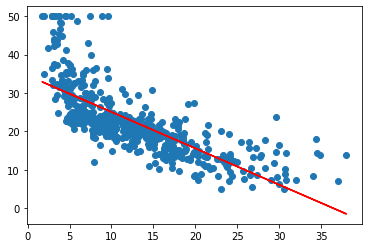

In [114]:
df2 = df.LSTAT
df2 = sm.add_constant(df2)

est = sm.OLS(y, df2).fit()

yfit = est.predict(df2)

fig, ax = plt.subplots()
ax.scatter(df2.LSTAT, y)
ax.plot(df2.LSTAT, yfit, "r");

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **3.3** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [134]:
# received help from Javad

def reg_plot_on_ax(feature, ax):
    df2 = df[feature]
    df2 = sm.add_constant(df2)

    est = sm.OLS(y, df2).fit()

    yfit = est.predict(df2)

    ax.scatter(df2[feature], y)
    ax.plot(df2[feature], yfit, "r");

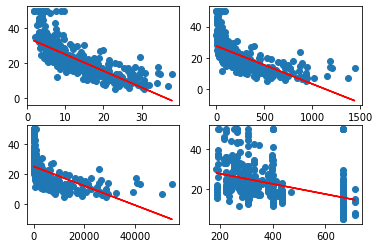

In [132]:
fig, ax = plt.subplots(2,2)

ax1 = ax[0,0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]

axes = [ax1, ax2, ax3, ax4]
plots = ["LSTAT", "LSTAT^2", "LSTAT^3", "TAX"]

for i in range(len(plots)):
    reg_plot_on_ax(plots[i], axes[i])